## 相关设置

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # 一个cell允许显示多输出

## 数据加载与展示

In [2]:
training = pd.read_csv("train.csv") # index_col=0,index_col=1默认第一列id_num作为index读入
training.shape
training.head(10)

(49998, 16)

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y,Y_1,136.0,150.0,offline,intermediate,9389.0,M,Matriculation,3.0,24.0,5.0,N,1.0,0
1,16523_44,T,T_1,131.0,44.0,offline,easy,16523.0,F,High School Diploma,4.0,26.0,2.0,N,3.0,1
2,13987_178,Z,Z_2,120.0,178.0,online,easy,13987.0,M,Matriculation,1.0,40.0,1.0,N,2.0,1
3,13158_32,T,T_2,117.0,32.0,offline,easy,13158.0,F,Matriculation,3.0,NaN,4.0,N,1.0,1
4,10591_84,V,V_3,131.0,84.0,offline,intermediate,10591.0,F,High School Diploma,1.0,42.0,2.0,N,4.0,1
5,12531_23,T,T_3,134.0,23.0,offline,intermediate,12531.0,F,High School Diploma,1.0,29.0,4.0,N,2.0,0
6,17874_144,Y,Y_2,120.0,144.0,online,easy,17874.0,M,Bachelors,2.0,48.0,3.0,N,3.0,1
7,8129_61,U,U_1,134.0,NaN,online,easy,8129.0,M,Matriculation,2.0,45.0,1.0,N,1.0,1
8,5652_57,U,U_1,134.0,57.0,offline,easy,5652.0,M,Matriculation,4.0,NaN,3.0,N,3.0,1
9,17019_153,Y,Y_1,136.0,153.0,offline,hard,17019.0,M,Bachelors,3.0,28.0,2.0,N,4.0,1


In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Data columns (total 16 columns):
id_num                       49998 non-null object
program_type                 49267 non-null object
program_id                   49299 non-null object
program_duration             49323 non-null float64
test_id                      49273 non-null float64
test_type                    49296 non-null object
difficulty_level             49295 non-null object
trainee_id                   49259 non-null float64
gender                       49291 non-null object
education                    49296 non-null object
city_tier                    49298 non-null float64
age                          30619 non-null float64
total_programs_enrolled      49306 non-null float64
is_handicapped               49280 non-null object
trainee_engagement_rating    49226 non-null float64
is_pass                      49998 non-null int64
dtypes: float64(7), int64(1), object(8)
memory usage: 6.1+ MB


In [4]:
training.describe()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,49323.000000,49273.000000,49259.000000,49298.000000,30619.000000,49306.000000,49226.000000,49998.000000
mean,128.229366,91.414345,9863.493128,2.249097,36.514256,2.583114,2.397818,0.696288
std,6.889967,51.307852,5716.490640,1.010896,9.045487,1.239399,1.326378,0.459864
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5051.500000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,91.000000,9665.000000,2.000000,40.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14618.000000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20097.000000,4.000000,63.000000,14.000000,5.000000,1.000000


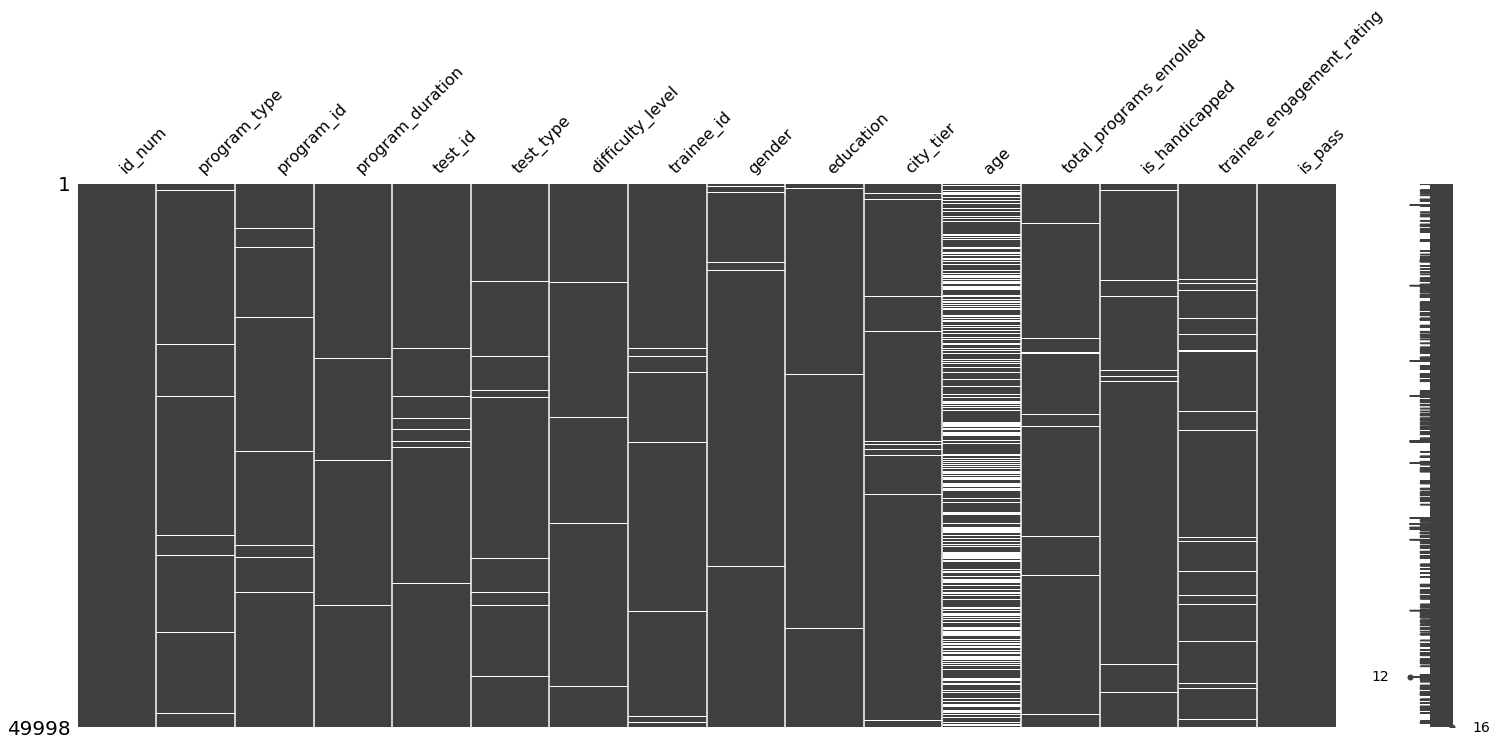

In [5]:
msno.matrix(training)

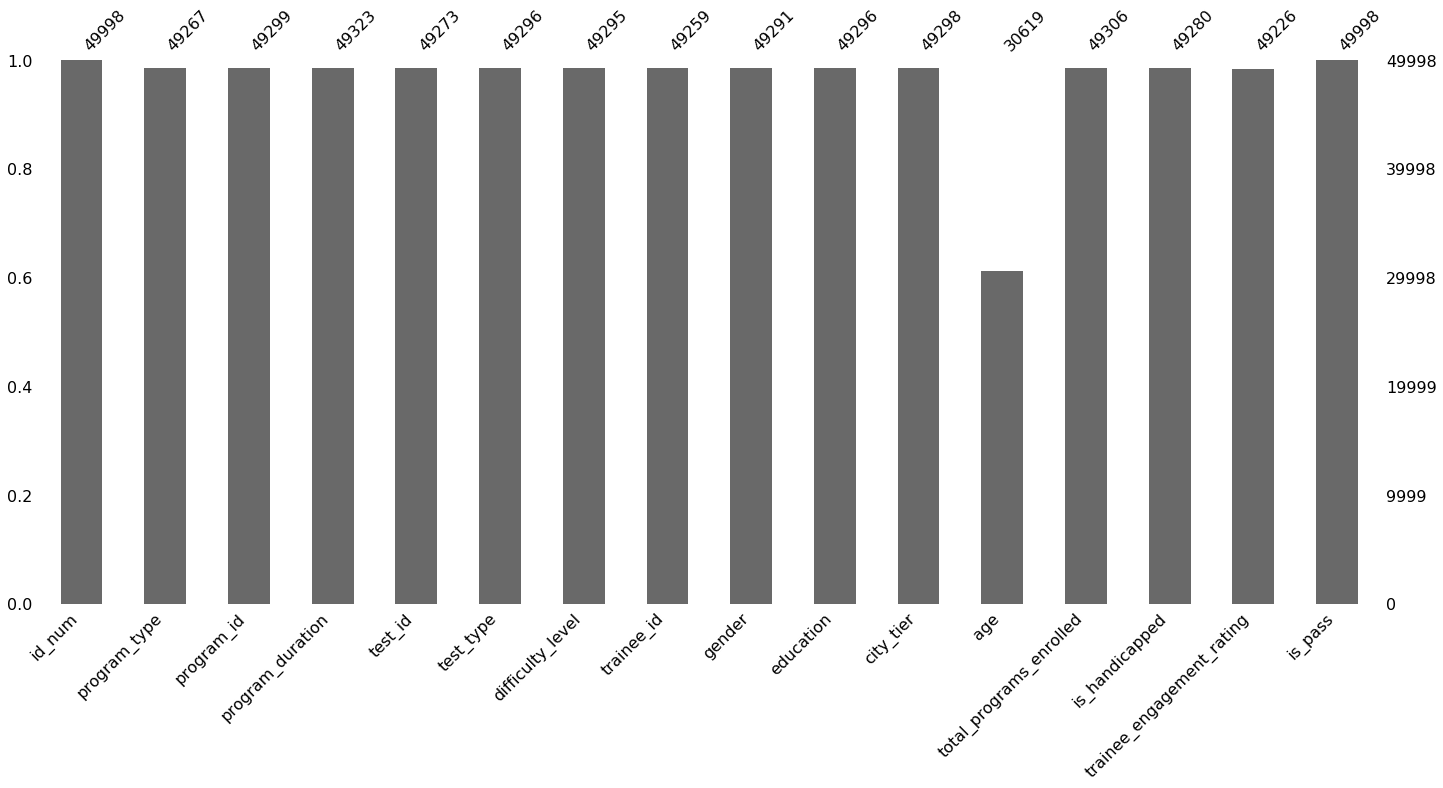

In [6]:
msno.bar(training)

## 缺失值处理

In [7]:
# 处理缺失值较多的age特征
training.age = training.age.fillna(training.age.mean())
training.age.describe()
# training.age.isnull()

count    49998.000000
mean        36.514256
std          7.078617
min         17.000000
25%         31.000000
50%         36.514256
75%         43.000000
max         63.000000
Name: age, dtype: float64

In [8]:
# 删除其余缺失值不多的特征
training = training.dropna(axis=0, how='any') #subset = ['program_id', 'program_type', 'program_duration', 'test_type', 'test_id', 'trainee_id', 'difficulty_level', 'gender', 'education', 'city_tier', 'total_programs_enrolled', 'is_handicapped', 'trainee_engagement_rating']太麻烦了

In [9]:
# program_id特征类别太多不好编码
training = training.drop('program_id', axis=1)

In [10]:
# 使用hexbin图展示与持续天数的关系
# sns.stripplot(x="difficulty_level", y="is_pass", data=training)
# training.plot.hexbin(x="is_pass", y="program_duration", sharex=False, gridsize=15)
# sns.scatterplot(x=training.difficulty_level, y=training.program_duration, hue=training.is_pass)
# sns.stripplot(x="program_duration", y="is_pass", data=training)
# 都没什么用

## 欠采样

In [11]:
training.is_pass.value_counts()
# 正样本数量远大于负样本数量，需要进行欠采样
"""
此为网上搜寻到的为反例为欠采样的算法，有待考究。
def undersampling(train, desired_apriori):

    # Get the indices per target value
    idx_0 = train[train.target == 0].index
    idx_1 = train[train.target == 1].index
    # Get original number of records per target value
    nb_0 = len(train.loc[idx_0])
    nb_1 = len(train.loc[idx_1])
    # Calculate the undersampling rate and resulting number of records with target=0
    undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
    undersampled_nb_0 = int(undersampling_rate*nb_0)
    print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
    print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))
    # Randomly select records with target=0 to get at the desired a priori
    undersampled_idx = shuffle(idx_0, n_samples=undersampled_nb_0)
    # Construct list with remaining indices
    idx_list = list(undersampled_idx) + list(idx_1)
    # Return undersample data frame
    train = train.loc[idx_list].reset_index(drop=True)

    return train

def easyensemble(df, desired_apriori, n_subsets=10):
    train_resample = []
    for _ in range(n_subsets):
        sel_train = undersampling(df, desired_apriori)
        train_resample.append(sel_train)
    return train_resample
"""

1    28889
0    12579
Name: is_pass, dtype: int64

## 独热编码

In [12]:
# 用get_dummies对所有字符串型的列进行独热编码
# tr = pd.get_dummies(tr) 数据量过大

# 用LabelEncoder（标签编码）处理difficulty_level、education特征
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#le.fit(tr['difficulty_level'].drop_duplicates().values.tolist())  将dataframe的difficulty_level这列特征转化为列表
#le.transform(tr['difficulty_level'].values.tolist())  将为列表的输出结果再转化为dataframe的一列
#le.fit(tr.difficulty_level)

#tr.difficulty_level = tr.difficulty_level.map(lambda s:'<unkown>' if s not in le.classes_ else s)
#le.classes_ = np.append(le.classes_, '<unkown>')

#tr.difficulty_level = le.transform(tr.difficulty_level)
#tr.difficulty_level.value_counts()

# 用One—Hot（独热编码）处理test_type、gender、is_handicapped、program_type、program_id特征


easy            22673
intermediate    11758
hard             5874
vary hard        1163
Name: difficulty_level, dtype: int64

array(['offline', 'online'], dtype=object)

offline    24735
online     16733
Name: test_type, dtype: int64

array([0, 1], dtype=int64)

array(['M', 'F'], dtype=object)

M    22131
F    19337
Name: gender, dtype: int64

array([0, 1], dtype=int64)

array(['Matriculation', 'High School Diploma', 'Bachelors', 'Masters',
       'No Qualification'], dtype=object)

High School Diploma    19494
Matriculation          14867
Bachelors               6523
Masters                  306
No Qualification         278
Name: education, dtype: int64

array([1, 2, 3, 4, 0], dtype=int64)

Y    12802
T    10383
V     7411
U     4441
Z     3817
X     1885
S      729
Name: program_type, dtype: int64

count     41468
unique        7
top           Y
freq      12802
Name: program_type, dtype: object

array(['N', 'Y'], dtype=object)

N    37701
Y     3767
Name: is_handicapped, dtype: int64

,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
count,41468.000000,41468.000000,41468.000000,41468.000000,41468.000000,41468.000000,41468.000000,41468.000000,41468.000000,41468.000000,41468.000000,41468.000000,41468.000000,41468.000000
mean,1.630052,128.212405,91.400719,0.403516,0.650984,9877.189278,0.466311,1.800135,2.249687,36.530317,2.585126,0.909159,2.397535,0.696658
std,1.585602,6.889023,51.231736,0.490608,0.823892,5720.148060,0.498870,0.729533,1.011196,7.076440,1.241136,0.287387,1.324701,0.459707
min,0.000000,117.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,17.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,121.000000,45.000000,0.000000,0.000000,5065.000000,0.000000,1.000000,1.000000,31.000000,2.000000,1.000000,1.000000,0.000000
50%,1.000000,131.000000,91.000000,0.000000,0.000000,9683.000000,0.000000,2.000000,2.000000,36.514256,2.000000,1.000000,2.000000,1.000000
75%,3.000000,134.000000,135.000000,1.000000,1.000000,14637.750000,1.000000,2.000000,3.000000,43.000000,3.000000,1.000000,4.000000,1.000000
max,6.000000,136.000000,187.000000,1.000000,3.000000,20097.000000,1.000000,4.000000,4.000000,63.000000,14.000000,1.000000,5.000000,1.000000


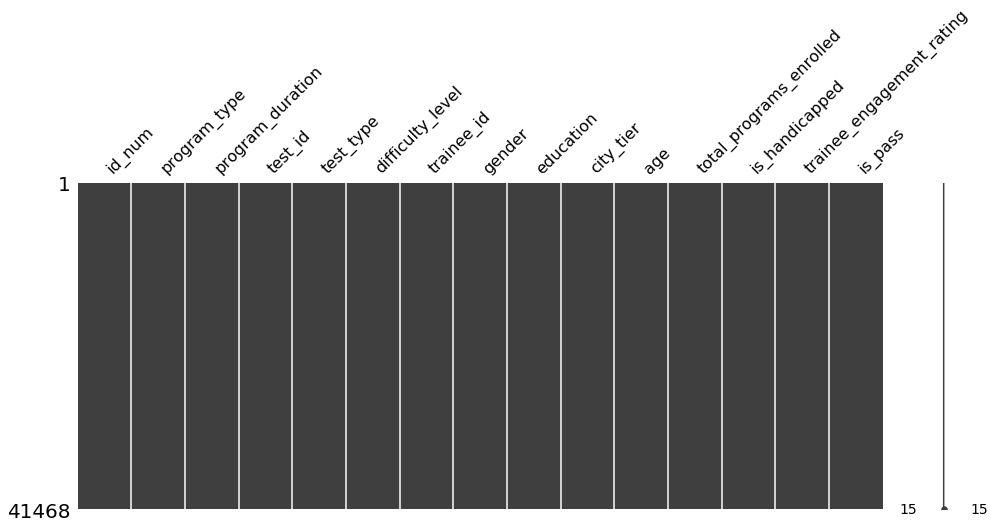

In [13]:
# 对difficulty_level进行独热编码
training.difficulty_level.value_counts()
training.loc[training['difficulty_level'] == 'easy', "difficulty_level"] = 0
training.loc[training['difficulty_level'] == 'intermediate', "difficulty_level"] = 1
training.loc[training['difficulty_level'] == 'hard', "difficulty_level"] = 2
training.loc[training['difficulty_level'] == 'vary hard', "difficulty_level"] = 3

# 处理test_type特征
training.test_type.unique()
training.test_type.value_counts()
training.loc[training.test_type == 'offline', "test_type"] = 0
training.loc[training.test_type == 'online', "test_type"] = 1
training.test_type.unique()

# 处理gender特征
training.gender.unique()
training.gender.value_counts()
training.loc[training.gender == 'M', "gender"] = 0
training.loc[training.gender == 'F', "gender"] = 1
training.gender.unique()

# 处理education特征
training.education.unique()
training.education.value_counts()
training.loc[training.education == 'No Qualification', "education"] = 0
training.loc[training.education == 'Matriculation', "education"] = 1
training.loc[training.education == 'High School Diploma', "education"] = 2
training.loc[training.education == 'Bachelors', "education"] = 3
training.loc[training.education == 'Masters', "education"] = 4
training.education.unique()

# 独热编码program_type特征
training.program_type.value_counts()
training.program_type.describe()
training.loc[training.program_type == 'Y', "program_type"] = 0
training.loc[training.program_type == 'T', "program_type"] = 1
training.loc[training.program_type == 'V', "program_type"] = 2
training.loc[training.program_type == 'U', "program_type"] = 3
training.loc[training.program_type == 'Z', "program_type"] = 4
training.loc[training.program_type == 'X', "program_type"] = 5
training.loc[training.program_type == 'S', "program_type"] = 6

# 独热编码is_handicapped特征
training.is_handicapped.unique()
training.is_handicapped.value_counts()
training.loc[training.is_handicapped == 'Y', "is_handicapped"] = 0
training.loc[training.is_handicapped == 'N', "is_handicapped"] = 1

msno.matrix(training, figsize=(16, 6))
training.describe()

## 标准化

In [14]:
from sklearn import preprocessing

is_pass = training.is_pass # 将is_pass单独留出来
training_np = training.drop(['id_num', 'is_pass'], axis=1).values # 转化为数组再进行标准化处理

scaler = preprocessing.StandardScaler().fit(training_np)
training_np = scaler.transform(training_np)

In [15]:
training = pd.DataFrame(training_np) # 转回来
training.columns = ["program_type", "program_duration", "test_id", "test_type", "difficulty_level", "trainee_id", "gender", "education", "city_tier", "age", "total_programs_enrolled", "is_handicapped", "trainee_engagement_rating"]# 重新加上index
training.describe()

,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
count,4.146800e+04,4.146800e+04,4.146800e+04,4.146800e+04,4.146800e+04,4.146800e+04,4.146800e+04,4.146800e+04,4.146800e+04,4.146800e+04,4.146800e+04,4.146800e+04,4.146800e+04
mean,2.909958e-16,-5.300895e-16,1.020092e-16,-5.246545e-16,-6.286570e-17,1.081683e-16,5.342982e-16,4.845004e-16,1.950119e-16,1.414324e-15,-1.069175e-15,1.089726e-15,7.723370e-16
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-1.028046e+00,-1.627595e+00,-1.784086e+00,-8.224906e-01,-7.901425e-01,-1.726583e+00,-9.347469e-01,-2.467546e+00,-1.235865e+00,-2.759940e+00,-1.277173e+00,-3.163579e+00,-1.054995e+00
25%,-1.028046e+00,-1.046954e+00,-9.057136e-01,-8.224906e-01,-7.901425e-01,-8.412802e-01,-9.347469e-01,-1.096790e+00,-1.235865e+00,-7.815205e-01,-4.714496e-01,3.160977e-01,-1.054995e+00
50%,-3.973630e-01,4.046479e-01,-7.821782e-03,-8.224906e-01,-7.901425e-01,-3.394871e-02,-9.347469e-01,2.739661e-01,-2.469249e-01,-2.269667e-03,-4.714496e-01,3.160977e-01,-3.000981e-01
75%,8.640025e-01,8.401286e-01,8.510312e-01,1.215819e+00,4.236241e-01,8.322544e-01,1.069808e+00,2.739661e-01,7.420148e-01,9.142677e-01,3.342738e-01,3.160977e-01,1.209695e+00
max,2.756051e+00,1.130449e+00,1.866039e+00,1.215819e+00,2.851157e+00,1.786655e+00,1.069808e+00,3.015478e+00,1.730954e+00,3.740582e+00,9.197231e+00,3.160977e-01,1.964591e+00


## 特征工程
### 特征选择

In [16]:
# 基于L1范数的特征选择
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
X,y = training, is_pass
X.shape

lsvc = LinearSVC(C=0.0003, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new1 = model.transform(X) # X_new为数组
X_new1.shape
X_new1 = pd.DataFrame(X_new1)
X_new1.describe()

(41468, 13)

(41468, 5)

,0,1,2,3,4
count,4.146800e+04,4.146800e+04,4.146800e+04,4.146800e+04,4.146800e+04
mean,-5.246545e-16,-6.286570e-17,4.845004e-16,1.950119e-16,7.723370e-16
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-8.224906e-01,-7.901425e-01,-2.467546e+00,-1.235865e+00,-1.054995e+00
25%,-8.224906e-01,-7.901425e-01,-1.096790e+00,-1.235865e+00,-1.054995e+00
50%,-8.224906e-01,-7.901425e-01,2.739661e-01,-2.469249e-01,-3.000981e-01
75%,1.215819e+00,4.236241e-01,2.739661e-01,7.420148e-01,1.209695e+00
max,1.215819e+00,2.851157e+00,3.015478e+00,1.730954e+00,1.964591e+00


In [17]:
# 基于惩罚项的特征选择法
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

#带L1惩罚项的逻辑回归作为基模型的特征选择
SelectFromModel(LogisticRegression(penalty='l1',C=0.001)).fit_transform(X, y)

# 构建一个逻辑回归模型
class LR(LogisticRegression):
    def __init__(self, threshold=0.01, dual=False, tol=1e-4, C=1.0,
                 fit_intercept=True, intercept_scaling=1, class_weight=None,
                 random_state=None, solver='liblinear', max_iter=100,
                 multi_class='ovr', verbose=0, warm_start=False, n_jobs=1):
 
        #权值相近的阈值
        self.threshold = threshold
        LogisticRegression.__init__(self, penalty='l1', dual=dual, tol=tol, C=C,
                 fit_intercept=fit_intercept, intercept_scaling=intercept_scaling, class_weight=class_weight,
                 random_state=random_state, solver=solver, max_iter=max_iter,
                 multi_class=multi_class, verbose=verbose, warm_start=warm_start, n_jobs=n_jobs)
        #使用同样的参数创建L2逻辑回归
        self.l2 = LogisticRegression(penalty='l2', dual=dual, tol=tol, C=C, fit_intercept=fit_intercept, intercept_scaling=intercept_scaling, class_weight = class_weight, random_state=random_state, solver=solver, max_iter=max_iter, multi_class=multi_class, verbose=verbose, warm_start=warm_start, n_jobs=n_jobs)
 
    def fit(self, X, y, sample_weight=None):
        #训练L1逻辑回归
        super(LR, self).fit(X, y, sample_weight=sample_weight)
        self.coef_old_ = self.coef_.copy()
        #训练L2逻辑回归
        self.l2.fit(X, y, sample_weight=sample_weight)
 
        cntOfRow, cntOfCol = self.coef_.shape
        #权值系数矩阵的行数对应目标值的种类数目
        for i in range(cntOfRow):
            for j in range(cntOfCol):
                coef = self.coef_[i][j]
                #L1逻辑回归的权值系数不为0
                if coef != 0:
                    idx = [j]
                    #对应在L2逻辑回归中的权值系数
                    coef1 = self.l2.coef_[i][j]
                    for k in range(cntOfCol):
                        coef2 = self.l2.coef_[i][k]
                        #在L2逻辑回归中，权值系数之差小于设定的阈值，且在L1中对应的权值为0
                        if abs(coef1-coef2) < self.threshold and j != k and self.coef_[i][k] == 0:
                            idx.append(k)
                    #计算这一类特征的权值系数均值
                    mean = coef / len(idx)
                    self.coef_[i][idx] = mean
        return self

#带L1和L2惩罚项的逻辑回归作为基模型的特征选择
#参数threshold为权值系数之差的阈值
X_new2 = SelectFromModel(LR(threshold=0.001, C=0.001)).fit_transform(X, y)
X_new2 = pd.DataFrame(X_new2)
X_new2.shape
# X_new2.columns = ["test_type", "trainee_engagement_rating"]
X_new2.describe()

array([[-0.82249061,  0.42362408, -1.09678979,  0.74201478, -1.05499468],
       [-0.82249061, -0.79014247,  0.27396606,  1.73095444,  0.45479841],
       [ 1.21581935, -0.79014247, -1.09678979, -1.23586455, -0.30009814],
       ...,
       [-0.82249061,  1.63739063,  0.27396606, -0.24692489,  1.20969495],
       [ 1.21581935, -0.79014247,  0.27396606, -0.24692489, -1.05499468],
       [-0.82249061,  0.42362408, -1.09678979,  0.74201478,  1.96459149]])

(41468, 5)

,0,1,2,3,4
count,4.146800e+04,4.146800e+04,4.146800e+04,4.146800e+04,4.146800e+04
mean,-5.246545e-16,-6.286570e-17,4.845004e-16,1.950119e-16,7.723370e-16
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-8.224906e-01,-7.901425e-01,-2.467546e+00,-1.235865e+00,-1.054995e+00
25%,-8.224906e-01,-7.901425e-01,-1.096790e+00,-1.235865e+00,-1.054995e+00
50%,-8.224906e-01,-7.901425e-01,2.739661e-01,-2.469249e-01,-3.000981e-01
75%,1.215819e+00,4.236241e-01,2.739661e-01,7.420148e-01,1.209695e+00
max,1.215819e+00,2.851157e+00,3.015478e+00,1.730954e+00,1.964591e+00


In [18]:
# 两个特征选择选出来的都是一样的5个特征
X_new = X_new1 # 等同于X_new = X_new2

In [19]:
tr_new = pd.DataFrame(X_new, y)
tr_new.columns = ["test_type", "difficulty_level", "education", "city_tier", "trainee_engagement_rating"]
tr_new.describe()

,test_type,difficulty_level,education,city_tier,trainee_engagement_rating
count,4.146800e+04,41468.000000,41468.000000,41468.000000,41468.000000
mean,-8.224906e-01,-0.421956,-0.141842,1.430967,-0.003186
std,9.021781e-13,0.557977,0.630147,0.454623,0.694063
min,-8.224906e-01,-0.790142,-1.096790,0.742015,-1.054995
25%,-8.224906e-01,-0.790142,-1.096790,0.742015,-1.054995
50%,-8.224906e-01,-0.790142,0.273966,1.730954,0.454798
75%,-8.224906e-01,0.423624,0.273966,1.730954,0.454798
max,-8.224906e-01,0.423624,0.273966,1.730954,0.454798


## 筛选模型

### 逻辑回归

In [20]:
import sklearn.linear_model as sk_linear
from sklearn.model_selection import train_test_split

# 初始化逻辑回归类
model = sk_linear.LogisticRegression(penalty='l2', dual=False, C=1.0, n_jobs=1, random_state=20, fit_intercept=True)

X_train, x_test, y_train, y_test = train_test_split(tr_new, is_pass, test_size=0.33)

model.fit(X_train, y_train)

print('逻辑回归模型评价：', model.score(x_test, y_test))

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
"""
def Poly_log(degree, C, penalty='l2'):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std", StandardScaler()),
        ("Log", LogisticRegression(C=C, penalty=penalty))  #C为正则化前面的系数,penalty为正则项类型,使用L2
    ])

poly_log_reg = Poly_log(degree=20, C=0.1, penalty='l2')
poly_log_reg.fit(X_train, y_train)
print(poly_log_reg.score(X_train, y_train))
result2 = poly_log_reg.score(X_train,y_test)
print(result2)
"""
"""
# 逻辑回归交叉验证
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

alg = LogisticRegression(random_state=1, solver='liblinear') # 初始化逻辑回归类

score = model_selection.cross_val_score(alg, x_test, y_test, cv=3)
print("准确率为：", score.mean())"""

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=20, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

逻辑回归模型评价： 1.0


'\ndef Poly_log(degree, C, penalty=\'l2\'):\n    return Pipeline([\n        ("poly", PolynomialFeatures(degree=degree)),\n        ("std", StandardScaler()),\n        ("Log", LogisticRegression(C=C, penalty=penalty))  #C为正则化前面的系数,penalty为正则项类型,使用L2\n    ])\n\npoly_log_reg = Poly_log(degree=20, C=0.1, penalty=\'l2\')\npoly_log_reg.fit(X_train, y_train)\nprint(poly_log_reg.score(X_train, y_train))\nresult2 = poly_log_reg.score(X_train,y_test)\nprint(result2)\n'

'\n# 逻辑回归交叉验证\nfrom sklearn import model_selection\nfrom sklearn.linear_model import LogisticRegression\n\nalg = LogisticRegression(random_state=1, solver=\'liblinear\') # 初始化逻辑回归类\n\nscore = model_selection.cross_val_score(alg, x_test, y_test, cv=3)\nprint("准确率为：", score.mean())'

### 测试

In [21]:
import sklearn.externals as sk_externals
sk_externals.joblib.dump(model, 'model.pickle')# 保存训练好的模型
model = sk_externals.joblib.load('model.pickle')# 载入

X_test = pd.read_csv("test1_2.csv") # 不能index_col=0？？
X_test.shape
X_test.describe()
# X_test.set_index('id_num', inplace=True) # 将id_num作为index
msno.matrix(X_test)

['model.pickle']

NameError: name 'X_test' is not defined

In [ ]:
# 独热编码
X_test.age = X_test.age.fillna(X_test.age.mean())

X_test.difficulty_level.value_counts()
X_test.loc[X_test['difficulty_level'] == 'easy', "difficulty_level"] = 0
X_test.loc[X_test['difficulty_level'] == 'intermediate', "difficulty_level"] = 1
X_test.loc[X_test['difficulty_level'] == 'hard', "difficulty_level"] = 2
X_test.loc[X_test['difficulty_level'] == 'vary hard', "difficulty_level"] = 3
X_test.difficulty_level.value_counts()

X_test.test_type.value_counts()
X_test.loc[X_test.test_type == 'offline', "test_type"] = 0
X_test.loc[X_test.test_type == 'online', "test_type"] = 1
X_test.test_type.value_counts()

X_test.gender.value_counts()
X_test.loc[X_test.gender == 'M', "gender"] = 0
X_test.loc[X_test.gender == 'F', "gender"] = 1
X_test.gender.value_counts()

X_test.education.value_counts()
X_test.loc[X_test.education == 'No Qualification', "education"] = 0
X_test.loc[X_test.education == 'Matriculation', "education"] = 1
X_test.loc[X_test.education == 'High School Diploma', "education"] = 2
X_test.loc[X_test.education == 'Bachelors', "education"] = 3
X_test.loc[X_test.education == 'Masters', "education"] = 4
X_test.education.value_counts()

X_test.program_type.value_counts()
X_test.loc[X_test.program_type == 'Y', "program_type"] = 0
X_test.loc[X_test.program_type == 'T', "program_type"] = 1
X_test.loc[X_test.program_type == 'V', "program_type"] = 2
X_test.loc[X_test.program_type == 'U', "program_type"] = 3
X_test.loc[X_test.program_type == 'Z', "program_type"] = 4
X_test.loc[X_test.program_type == 'X', "program_type"] = 5
X_test.loc[X_test.program_type == 'S', "program_type"] = 6
X_test.program_type.value_counts()

X_test.is_handicapped.value_counts()
X_test.loc[X_test.is_handicapped == 'Y', "is_handicapped"] = 0
X_test.loc[X_test.is_handicapped == 'N', "is_handicapped"] = 1

#X_test = X_test.drop(['program_id', 'is_pass', 'education', 'program_type', 'test_type', 'difficulty_level', 'trainee_id', 'gender', 'city_tier', 'total_programs_enrolled', 'is_handicapped'], axis=1)
X_test.head()
msno.matrix(X_test)
X_test.describe()

In [ ]:
X_test.trainee_engagement_rating.isnull() # 这样以及可视化出来都显示trainee_engagement_rating特征无缺失值，可在文件中我找到了这一列有缺失值的地方
# X_test = X_test.dropna(axis=0, subset = ['trainee_engagement_rating']) # 尝试删去再看看
# 删去的话，后续读入测试结果不好处理
# 所以用均值补充
X_test.trainee_engagement_rating = X_test.trainee_engagement_rating.fillna(X_test.trainee_engagement_rating.mean())
X_test.describe()

In [ ]:
# 标准化
from sklearn import preprocessing

is_pass = X_test.is_pass# 将is_pass单独留出来
X_test_np = X_test.drop(['id_num', 'is_pass', 'program_id'], axis=1).values # 转化为数组再进行标准化处理

scaler = preprocessing.StandardScaler().fit(X_test_np)
X_test_np = scaler.transform(X_test_np)

X_test = pd.DataFrame(X_test_np) # 转回来
X_test.columns = ["program_type", "program_duration", "test_id", "test_type", "difficulty_level", "trainee_id", "gender", "education", "city_tier", "age", "total_programs_enrolled", "is_handicapped", "trainee_engagement_rating"]# 重新加上index
X_test.describe()

In [ ]:
predictors = ["test_type", "difficulty_level", "education", "city_tier", "trainee_engagement_rating"]

predictions = model.predict(X_test[predictors])#.test_id, X_test.age, X_test.trainee_engagement_rating

predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

predictions = pd.DataFrame(predictions)
predictions.describe()

# predictions.set_index(X_test['id_num'], inplace=True)

X_test = pd.DataFrame(X_test)

X_test ["is_pass"] = predictions
X_test.describe()
X_test.head()

In [ ]:
X_test.to_csv("test1_2.csv")
# 第二次用逻辑回归测试，准确率：0.4
# 第三次加上标准化，准确率：0.56736

### 线性回归

In [22]:
from sklearn.linear_model import LinearRegression # 线性回归的二分类进行分类预测
from sklearn.model_selection import KFold # K折交叉验证，去平均，调参

predictors = ["program_type", "program_duration", "test_type", "difficulty_level", "gender", "education", "age", "trainee_engagement_rating"]

alg = LinearRegression() # 初始化线性回归类
kf = KFold(n_splits=7, shuffle=True, random_state=1) # KFold类实例化

predictions = []

# 进行7次for循环，每次建立一个回归模型
for train, test in kf.split(training):
    train_predictors = (training[predictors].iloc[train, :])
    train_target = is_pass.iloc[train]
    alg.fit(train_predictors, train_target) # 训练模型
    test_predictions = alg.predict(training[predictors].iloc[test, :]) # 检验模型误差
    predictions.append(test_predictions)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
predictions = np.concatenate(predictions, axis=0) # 转换成数组比较大小

# 使用线性回归得到的结果是在区间[0,1]上的某个值，需要将该值转换成0或1
predictions[predictions > 0.5] = 1
predictions[predictions <= 0.5] = 0

print("测试数据的总数量：", len(predictions))
print("正确的数量：", sum(predictions == is_pass))
print("准确率为：", sum(predictions == is_pass) / len(predictions))

测试数据的总数量： 41468
正确的数量： 28444
准确率为： 0.685926497540272


In [24]:
import sklearn.externals as sk_externals
model = alg
sk_externals.joblib.dump(model, 'lin_model.pickle')# 保存训练好的模型
model = sk_externals.joblib.load('lin_model.pickle')# 载入

['lin_model.pickle']

In [25]:
# 线性回归中的参数w和b
w = alg.coef_
b = alg.intercept_
print(w, b)

[ 0.01260529  0.00030171  0.0378948  -0.03618574  0.01256024  0.0371519
  0.00664213  0.09548462] 0.6951914553157835


### 测试模型

easy            6342
intermediate    3196
hard            1593
vary hard        334
Name: difficulty_level, dtype: int64

0    6342
1    3196
2    1593
3     334
Name: difficulty_level, dtype: int64

offline    6830
online     4635
Name: test_type, dtype: int64

0    6830
1    4635
Name: test_type, dtype: int64

M    6092
F    5373
Name: gender, dtype: int64

0    6092
1    5373
Name: gender, dtype: int64

High School Diploma    5353
Matriculation          4136
Bachelors              1810
No Qualification         95
Masters                  71
Name: education, dtype: int64

2    5353
1    4136
3    1810
0      95
4      71
Name: education, dtype: int64

Y    3479
T    2933
V    2068
U    1229
Z    1005
X     525
S     226
Name: program_type, dtype: int64

0    3479
1    2933
2    2068
3    1229
4    1005
5     525
6     226
Name: program_type, dtype: int64

N    10454
Y     1011
Name: is_handicapped, dtype: int64

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,4753_31,1,T_3,134,31,1,0,4753,1,3,1,31.000000,4,1,2.0,NaN
1,10816_148,0,Y_2,120,148,1,0,10816,0,1,3,36.352292,2,1,4.0,NaN
2,7498_114,0,Y_4,121,114,0,1,7498,0,2,1,36.352292,3,1,1.0,NaN
3,14139_175,4,Z_2,120,175,1,0,14139,1,2,1,44.000000,1,0,1.0,NaN
4,11305_25,1,T_3,134,25,0,1,11305,0,2,2,49.000000,2,1,2.0,NaN


,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
count,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,0.0
mean,1.636023,128.179067,90.116616,0.404274,0.644047,9801.775142,0.468644,1.792935,2.232708,36.352292,2.581771,0.911819,2.382150,NaN
std,1.588298,6.890919,51.172182,0.490772,0.825828,5658.995423,0.499038,0.730553,1.012618,7.060975,1.229564,0.283571,1.313403,NaN
min,0.000000,117.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,17.000000,1.000000,0.000000,1.000000,NaN
25%,0.000000,121.000000,44.000000,0.000000,0.000000,5054.000000,0.000000,1.000000,1.000000,30.000000,2.000000,1.000000,1.000000,NaN
50%,1.000000,131.000000,89.000000,0.000000,0.000000,9580.000000,0.000000,2.000000,2.000000,36.352292,2.000000,1.000000,2.000000,NaN
75%,3.000000,134.000000,134.000000,1.000000,1.000000,14429.000000,1.000000,2.000000,3.000000,43.000000,3.000000,1.000000,3.000000,NaN
max,6.000000,136.000000,187.000000,1.000000,3.000000,20096.000000,1.000000,4.000000,4.000000,59.000000,12.000000,1.000000,5.000000,NaN


,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
count,1.146500e+04,1.146500e+04,1.146500e+04,1.146500e+04,1.146500e+04,1.146500e+04,1.146500e+04,1.146500e+04,1.146500e+04,1.146500e+04,1.146500e+04,1.146500e+04,1.146500e+04
mean,2.591134e-16,1.261878e-15,-1.311738e-16,-9.481392e-16,-3.878663e-16,-2.343428e-17,9.970219e-17,2.533565e-16,-9.217563e-17,2.816180e-16,7.019921e-16,9.631294e-16,-3.141258e-16
std,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00
min,-1.030093e+00,-1.622360e+00,-1.761124e+00,-8.237862e-01,-7.799144e-01,-1.731969e+00,-9.391360e-01,-2.454323e+00,-1.217401e+00,-2.740859e+00,-1.286505e+00,-3.215627e+00,-1.052389e+00
25%,-1.030093e+00,-1.041861e+00,-9.012441e-01,-8.237862e-01,-7.799144e-01,-8.390150e-01,-9.391360e-01,-1.085437e+00,-1.217401e+00,-8.996731e-01,-4.731726e-01,3.109813e-01,-1.052389e+00
50%,-4.004604e-01,4.093875e-01,-2.182171e-02,-8.237862e-01,-7.799144e-01,-3.919155e-02,-9.391360e-01,2.834482e-01,-2.298185e-01,0.000000e+00,-4.731726e-01,3.109813e-01,-2.909745e-01
75%,8.588041e-01,8.447621e-01,8.576007e-01,1.213907e+00,4.310442e-01,8.177117e-01,1.064809e+00,2.834482e-01,7.577636e-01,9.415128e-01,3.401593e-01,3.109813e-01,4.704397e-01
max,2.747701e+00,1.135012e+00,1.893365e+00,1.213907e+00,2.852961e+00,1.819170e+00,1.064809e+00,3.021219e+00,1.745346e+00,3.207588e+00,7.660147e+00,3.109813e-01,1.993268e+00


,0
count,11465.000000
mean,0.969996
std,0.170607
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
count,1.146500e+04,1.146500e+04,1.146500e+04,1.146500e+04,1.146500e+04,1.146500e+04,1.146500e+04,1.146500e+04,1.146500e+04,1.146500e+04,1.146500e+04,1.146500e+04,1.146500e+04,11465.000000
mean,2.591134e-16,1.261878e-15,-1.311738e-16,-9.481392e-16,-3.878663e-16,-2.343428e-17,9.970219e-17,2.533565e-16,-9.217563e-17,2.816180e-16,7.019921e-16,9.631294e-16,-3.141258e-16,0.969996
std,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,0.170607
min,-1.030093e+00,-1.622360e+00,-1.761124e+00,-8.237862e-01,-7.799144e-01,-1.731969e+00,-9.391360e-01,-2.454323e+00,-1.217401e+00,-2.740859e+00,-1.286505e+00,-3.215627e+00,-1.052389e+00,0.000000
25%,-1.030093e+00,-1.041861e+00,-9.012441e-01,-8.237862e-01,-7.799144e-01,-8.390150e-01,-9.391360e-01,-1.085437e+00,-1.217401e+00,-8.996731e-01,-4.731726e-01,3.109813e-01,-1.052389e+00,1.000000
50%,-4.004604e-01,4.093875e-01,-2.182171e-02,-8.237862e-01,-7.799144e-01,-3.919155e-02,-9.391360e-01,2.834482e-01,-2.298185e-01,0.000000e+00,-4.731726e-01,3.109813e-01,-2.909745e-01,1.000000
75%,8.588041e-01,8.447621e-01,8.576007e-01,1.213907e+00,4.310442e-01,8.177117e-01,1.064809e+00,2.834482e-01,7.577636e-01,9.415128e-01,3.401593e-01,3.109813e-01,4.704397e-01,1.000000
max,2.747701e+00,1.135012e+00,1.893365e+00,1.213907e+00,2.852961e+00,1.819170e+00,1.064809e+00,3.021219e+00,1.745346e+00,3.207588e+00,7.660147e+00,3.109813e-01,1.993268e+00,1.000000


,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,-0.400460,0.844762,-1.155299,1.213907,-0.779914,-0.892207,1.064809,1.652334,-1.217401,-0.758043,1.153491,0.310981,-0.290974,1.0
1,-1.030093,-1.186986,1.131199,1.213907,-0.779914,0.179231,-0.939136,-1.085437,0.757764,0.000000,-0.473173,0.310981,1.231854,1.0
2,-1.030093,-1.041861,0.466746,-0.823786,0.431044,-0.407117,-0.939136,0.283448,-1.217401,0.000000,0.340159,0.310981,-1.052389,1.0
3,1.488436,-1.186986,1.658852,1.213907,-0.779914,0.766464,1.064809,0.283448,-1.217401,1.083142,-1.286505,-3.215627,-1.052389,1.0
4,-0.400460,0.844762,-1.272556,-0.823786,0.431044,0.265646,-0.939136,0.283448,-0.229819,1.791291,-0.473173,0.310981,-0.290974,1.0


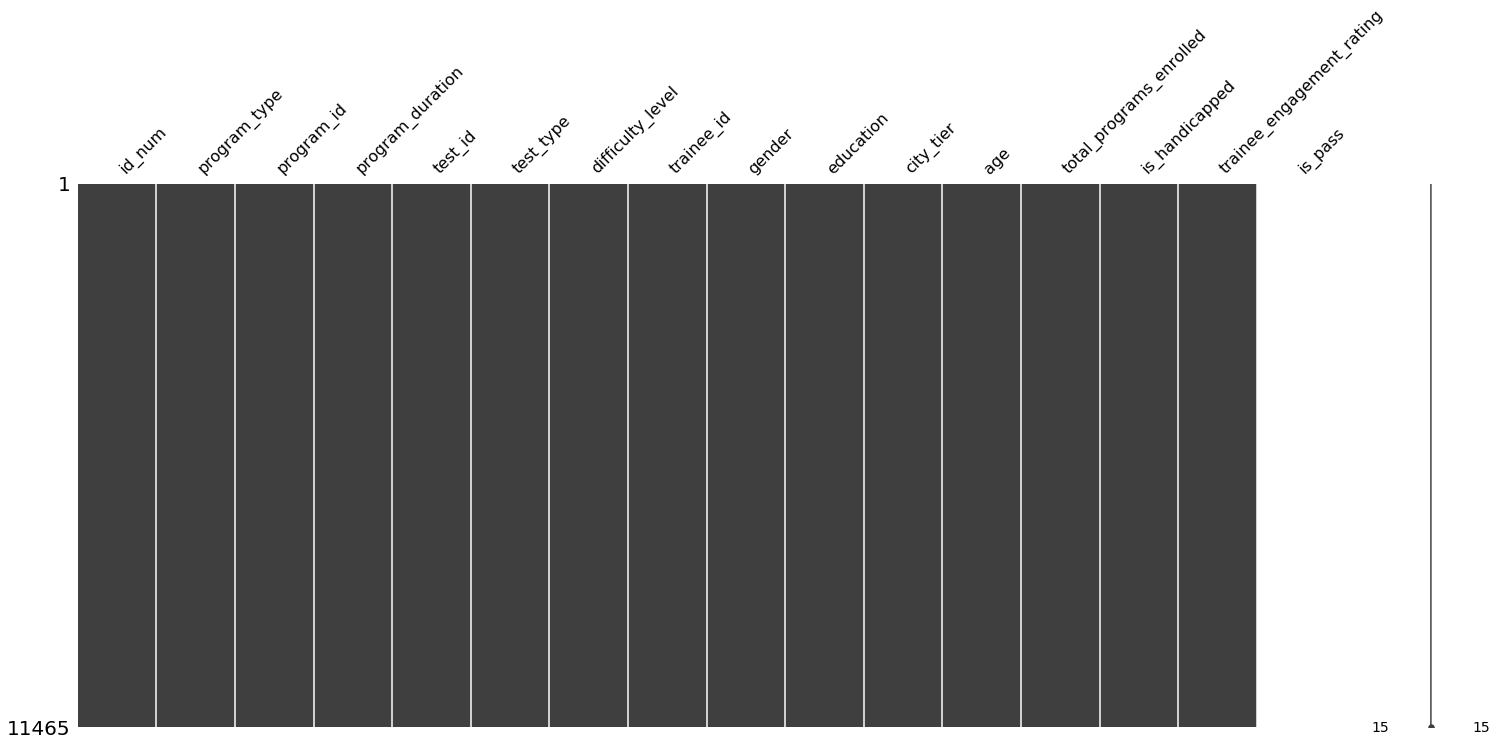

In [26]:
X_test = pd.read_csv("test2_2.csv")

lin = LinearRegression()
predictions_test1 = []
predictors = ["program_type", "program_duration", "test_type", "difficulty_level", "gender", "education", "age", "trainee_engagement_rating"]

# 独热编码
X_test.age = X_test.age.fillna(X_test.age.mean())

X_test.difficulty_level.value_counts()
X_test.loc[X_test['difficulty_level'] == 'easy', "difficulty_level"] = 0
X_test.loc[X_test['difficulty_level'] == 'intermediate', "difficulty_level"] = 1
X_test.loc[X_test['difficulty_level'] == 'hard', "difficulty_level"] = 2
X_test.loc[X_test['difficulty_level'] == 'vary hard', "difficulty_level"] = 3
X_test.difficulty_level.value_counts()

X_test.test_type.value_counts()
X_test.loc[X_test.test_type == 'offline', "test_type"] = 0
X_test.loc[X_test.test_type == 'online', "test_type"] = 1
X_test.test_type.value_counts()

X_test.gender.value_counts()
X_test.loc[X_test.gender == 'M', "gender"] = 0
X_test.loc[X_test.gender == 'F', "gender"] = 1
X_test.gender.value_counts()

X_test.education.value_counts()
X_test.loc[X_test.education == 'No Qualification', "education"] = 0
X_test.loc[X_test.education == 'Matriculation', "education"] = 1
X_test.loc[X_test.education == 'High School Diploma', "education"] = 2
X_test.loc[X_test.education == 'Bachelors', "education"] = 3
X_test.loc[X_test.education == 'Masters', "education"] = 4
X_test.education.value_counts()

X_test.program_type.value_counts()
X_test.loc[X_test.program_type == 'Y', "program_type"] = 0
X_test.loc[X_test.program_type == 'T', "program_type"] = 1
X_test.loc[X_test.program_type == 'V', "program_type"] = 2
X_test.loc[X_test.program_type == 'U', "program_type"] = 3
X_test.loc[X_test.program_type == 'Z', "program_type"] = 4
X_test.loc[X_test.program_type == 'X', "program_type"] = 5
X_test.loc[X_test.program_type == 'S', "program_type"] = 6
X_test.program_type.value_counts()

X_test.is_handicapped.value_counts()
X_test.loc[X_test.is_handicapped == 'Y', "is_handicapped"] = 0
X_test.loc[X_test.is_handicapped == 'N', "is_handicapped"] = 1

X_test.trainee_engagement_rating = X_test.trainee_engagement_rating.fillna(X_test.trainee_engagement_rating.mean())

#X_test = X_test.drop(['program_id', 'is_pass', 'education', 'program_type', 'test_type', 'difficulty_level', 'trainee_id', 'gender', 'city_tier', 'total_programs_enrolled', 'is_handicapped'], axis=1)
X_test.head()
msno.matrix(X_test)
X_test.describe()

# 标准化
from sklearn import preprocessing

is_pass = X_test.is_pass# 将is_pass单独留出来
X_test_np = X_test.drop(['id_num', 'is_pass', 'program_id'], axis=1).values # 转化为数组再进行标准化处理

scaler = preprocessing.StandardScaler().fit(X_test_np)
X_test_np = scaler.transform(X_test_np)

X_test = pd.DataFrame(X_test_np) # 转回来
X_test.columns = ["program_type", "program_duration", "test_id", "test_type", "difficulty_level", "trainee_id", "gender", "education", "city_tier", "age", "total_programs_enrolled", "is_handicapped", "trainee_engagement_rating"]# 重新加上index
X_test.describe()

#for i in lin.predict(X_test.predictors.iloc[X_test, :]):
#   predictions_test.append(i)

predictions_test = model.predict(X_test[predictors])

predictions_test[predictions_test <= 0.5] = 0
predictions_test[predictions_test > 0.5] = 1

predictions_test = pd.DataFrame(predictions_test)
predictions_test.describe()
is_pass = predictions_test
X_test["is_pass"] = is_pass
X_test.describe()
X_test.head()

In [27]:
X_test.to_csv("test2_2.csv")
# 第一次用线性回归测试，准确率：0.69865
# 用第二个测试集测试：0.70746